In [1]:
from nldg.utils import *
from adaXT.random_forest import RandomForest

In [2]:
dtr = gen_data_v6(n=1000, noise_std=0.5)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

In [3]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 13.181806223909755
Environment 1 MSE: 5.985511984704188
Environment 2 MSE: 1.5098758314189895


np.float64(13.181806223909755)

In [4]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

Environment 0 MSE: 9.309802763463583
Environment 1 MSE: 9.143744040842693
Environment 2 MSE: 3.178406865435695


np.float64(9.309802763463583)

In [5]:
rf.modify_predictions_trees(Etr, opt_method="extragradient")
fitted_rf_3 = rf.predict(Xtr)
preds_rf_3 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_3, Etr, verbose=True)

Environment 0 MSE: 9.307042693449398
Environment 1 MSE: 9.169722618210187
Environment 2 MSE: 3.2084008659308583


np.float64(9.307042693449398)

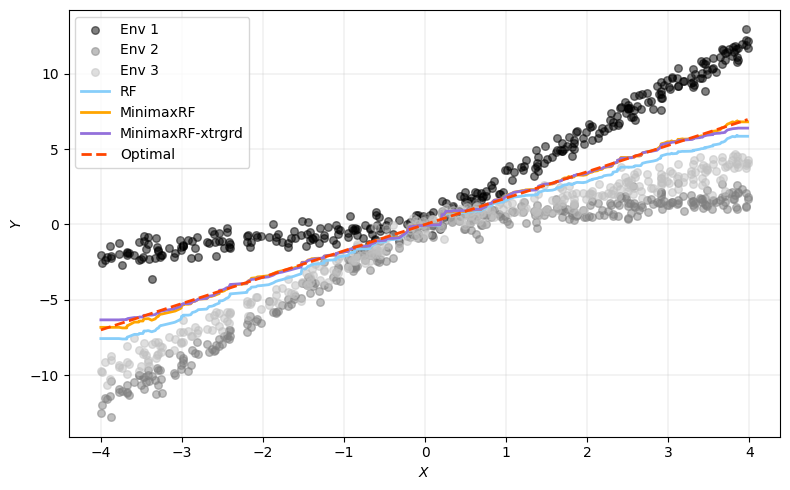

In [6]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2
dtr["fitted_minmax_xtrgrd"] = preds_rf_3
plot_dtr(dtr, optfun=3)

In [7]:
dtr = gen_data_v7(n=1500)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

In [8]:
rf = RandomForest("Regression",
                  n_estimators=n_estimators,
                  min_samples_leaf=min_samples_leaf,
                  seed=random_state,
                  )
rf.fit(Xtr, Ytr)
fitted_rf = rf.predict(Xtr)
preds_rf = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf, Etr, verbose=True)

Environment 0 MSE: 0.6491252306459793
Environment 1 MSE: 0.9944854316638767
Environment 2 MSE: 0.17889046608446182


np.float64(0.9944854316638767)

In [9]:
rf.modify_predictions_trees(Etr)
fitted_rf_2 = rf.predict(Xtr)
preds_rf_2 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_2, Etr, verbose=True)

Environment 0 MSE: 0.7794879916148291
Environment 1 MSE: 0.791872266753139
Environment 2 MSE: 0.3396310277810282


np.float64(0.791872266753139)

In [10]:
rf.modify_predictions_trees(Etr, opt_method="extragradient")
fitted_rf_3 = rf.predict(Xtr)
preds_rf_3 = rf.predict(Xtr_sorted)
max_mse(Ytr, fitted_rf_3, Etr, verbose=True)

Environment 0 MSE: 0.7794879916148291
Environment 1 MSE: 0.791872266753139
Environment 2 MSE: 0.3396310277810282


np.float64(0.791872266753139)

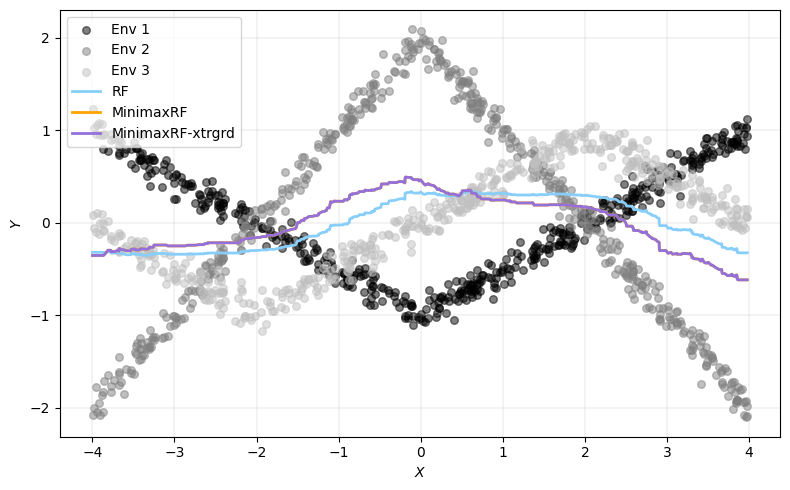

In [11]:
dtr["X_sorted"] = Xtr_sorted
dtr["fitted_rf"] = preds_rf
dtr["fitted_minmax"] = preds_rf_2
dtr["fitted_minmax_xtrgrd"] = preds_rf_3
plot_dtr(dtr)